# Fibonacci Numbers, Longest Increasing Subsequence, Knapsack Problem

Kabui, Charles  
2025-05-10

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/computational-techniques-in-data-science/fibonacci-numbers-longest-increasing-subsequence-knapsack-problem/index.html) -- [Download as Notebook](https://toknow.ai/posts/computational-techniques-in-data-science/fibonacci-numbers-longest-increasing-subsequence-knapsack-problem/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/computational-techniques-in-data-science/fibonacci-numbers-longest-increasing-subsequence-knapsack-problem/index.pdf)
 *** 

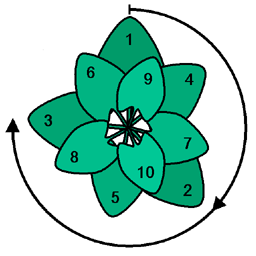

## Fibonacci Numbers

This is a sequence where each number is the sum of the two preceding
ones, starting with 0 and 1 (`0, 1, 1, 2, 3, 5, 8...`). The definition
is $F(n) = F(n − 1) + F(n − 2)$, with base cases $F(0) = 0$ and
$F(1) = 1$. You can generate this sequence using a **recursive
approach** (a function calling itself) or an **iterative approach**
(using loops). Recursion is simple conceptually but highly inefficient
for larger inputs with a time complexity of $O(2^n)$. The iterative
approach is much more efficient with a time complexity of $O(n)$.
Real-life uses include rabbit population modeling, financial algorithms,
and approximating the golden ratio.

### Plant Branch Growth

A rare plant grows following a Fibonacci-like pattern. In the first
cycle, it has 1 branch. In the second cycle, it grows 1 more. From the
third cycle onward, the number of new branches equals the total number
of branches in the previous two cycles.

**Task:**

How many branches will the plant have after 12 growth cycles?

**Hint:**

Model this as a Fibonacci sequence:

-   Cycle 1 → 1 branch
-   Cycle 2 → 1 branch
-   Cycle 3 → 2 branches
-   Cycle 4 → 3 branches

Find the total number of branches at cycle 12.

#### Answer

In [7]:
def fibonacci_branches(cycles):
    a, b = 1, 1
    for _ in range(3, cycles + 1):
        a, b = b, a + b
    return b

# Find the number of branches after 12 growth cycles
cycles = 12
branches = fibonacci_branches(cycles)
print(f"After {cycles} growth cycles, the plant will have {branches} branches.")

After 12 growth cycles, the plant will have 144 branches.

## Longest Increasing Subsequence (LIS)

Given an array of numbers, the task is to find the length of the longest
subsequence where the elements are in strictly increasing order. A naive
recursive approach exists but has exponential time complexity. More
efficient solutions use **Dynamic Programming** (bottom-up tabulation)
with $O(n^2)$ time and $O(n)$ space, or **Binary Search** with
$O(n Log n)$ time and $O(n)$ space. LIS has applications in areas like
stock market analysis, version control systems, and DNA sequence
alignment.

### Student Score Trends

A student’s test scores over a semester are recorded as:
`[72, 74, 69, 78, 80, 81, 75, 85, 88, 70, 92]`

**Task:**

Determine the longest consecutive sequence of scores where each score is
higher than the last one (i.e., a strictly increasing subsequence).

What is the length of this increasing trend?

#### Answer

In [8]:
import numpy as np

def longest_increasing_subsequence(scores):
    counts = []
    for i in range(len(scores)):
        if i == 0 or scores[i] < scores[counts[-1][-1]]:
            counts.append([i])
        else:
            counts[-1].append(i)
    return np.array(scores)[max(counts, key=len)]

# Student scores
scores = [72, 74, 69, 78, 80, 81, 75, 85, 88, 70, 92]

# Find length of the longest increasing subsequence
lis = longest_increasing_subsequence(scores)
print(f"The longest increasing trend is {lis} and the length is {len(lis)}")

The longest increasing trend is [69 78 80 81] and the length is 4

## Knapsack Problem

Given a set of items, each with a weight and profit, and a bag with a
maximum weight capacity (W), the goal is to choose items to put in the
bag to **maximize the total profit** without exceeding the capacity. A
crucial constraint is that you must take an item completely or not at
all (this is the 0/1 Knapsack variant). A naive recursive approach
involves considering all subsets of items, but this has exponential time
complexity $O(2^n)$. This DP approach has a time and space complexity of
$O(n * W)$.

### Server CPU Allocation

You manage a server with 30 CPU units available. You have a list of 7
tasks, each requiring a certain number of CPU units and offering a
reward in user satisfaction score:

| Task | CPU Time | Reward |
|------|----------|--------|
| A    | 5        | 30     |
| B    | 10       | 40     |
| C    | 3        | 20     |
| D    | 8        | 50     |
| E    | 7        | 45     |
| F    | 4        | 25     |
| G    | 6        | 35     |

**Task:**

Which combination of tasks should you select to maximize the total
reward without exceeding the 30 CPU unit limit?

#### Answer

In [9]:
import pulp
import pandas as pd

# Task data in a DataFrame
df = pd.DataFrame({
    'Task': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'CPU':  [5, 10, 3, 8, 7, 4, 6],
    'Reward': [30, 40, 20, 50, 45, 25, 35]
})

# Define binary decision variables for each row
df['Var'] = [pulp.LpVariable(f"x{i}", cat="Binary") for i in df.index]

# Define the problem
prob = pulp.LpProblem("Knapsack", pulp.LpMaximize)

# Objective: maximize total reward
prob += pulp.lpSum(df['Var'] * df['Reward'])

# Constraint: total CPU ≤ 30
prob += pulp.lpSum(df['Var'] * df['CPU']) <= 30

# Solve
prob.solve(pulp.PULP_CBC_CMD(msg=False))

# Get selected tasks
selected = df[df['Var'].apply(lambda v: v.value()) == 1]

print(f"Selected tasks: {selected['Task'].tolist()}")
print(f"CPU used: {sum(selected['CPU'])}")
print(f"Reward earned: {sum(selected['Reward'])}")

Selected tasks: ['A', 'D', 'E', 'F', 'G']
CPU used: 30
Reward earned: 185

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***